### ICP04-Gradient Descent Create a copy of the "WE02-Regression" model-fitting notebook. Rename the copied notebooks as "model4-model_fit"

# Predictive Modeling Example: Model fit

In this notebook, we will fit a model to the data we have prepared in the previous notebook. We will use the sci-kit learn library to fit a linear regression model to the data.

1. Import libraries and modules
2. Load data
3. Explore data
4. Fit model
5. Evaluate model
6. Save model

## Step 1: Import the libraries we will use in this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor 

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('ICP04_dataset.csv')

df.head(3)

,input,target
0,16.243454,8803.949866
1,-6.117564,-657.602516
2,-5.281718,-210.705031


In [3]:
X = df[['input']]
y = df[['target']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

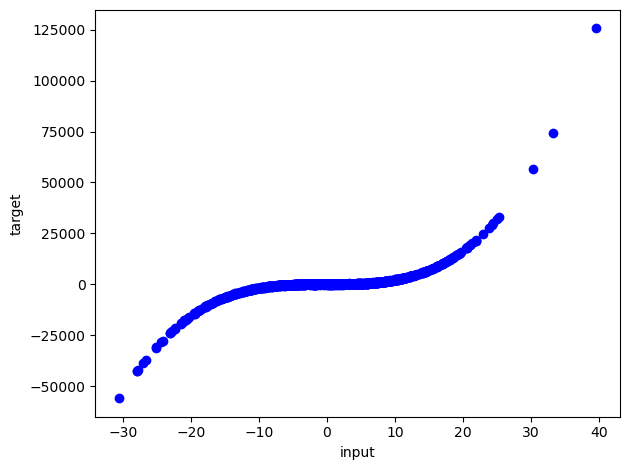

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['input'], df['target'], color='blue')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

### WE02-Regression step 3: Modify the model fitting notebook to correctly identify the hidden relationship between the input and output variables. Start by fitting a second-order polynomial and observe the results. Then, in the section below, fit a 3rd-order polynomial to capture the higher-order relationship.

### incorporating data splitting (cross-validation) to train the models (using an 80/20 split).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['input']], df[['target']], test_size=0.20, random_state=1)

In [6]:
trainData = X_train.copy()
trainData['target'] = y_train
trainData.head(3)

,input,target
382,-15.387932,-7251.253424
994,12.911889,4414.314652
982,1.751677,129.776296


In [7]:
trainData.to_csv('ICP04_train_dataset.csv', index=False) # Saving train data in csv file for record

In [8]:
testData = X_test.copy()
testData['target'] = y_test
testData.head(3)

,input,target
507,0.896864,-141.859686
818,-3.260613,87.151159
452,6.743961,670.791378


In [9]:
testData.to_csv('ICP04_test_dataset.csv', index=False) # Saving test data in csv file for record

### Creating a dataframe to hold all the results of our models.

In [10]:
results = pd.DataFrame(y_train, columns=["actual"])

rmses = pd.DataFrame({"model": [], "itertions": [], "rmse": []})

## Step 4a: Fit the model using a 1st order polynomial (linear regression)

Let's imagine that you're very new at this and you did not recognize that the relationship between x and y is clearly not a linear (1st order polynomial) relationship. 

In [11]:
lin_reg=LinearRegression()

lin_reg = LinearRegression().fit(X_train,y_train)

### Fitting the model on train data using 2nd order polynomial (linear regression technique)

In [12]:
new_df = pd.DataFrame()
new_df['x1'] = trainData['input']
new_df['x2'] = trainData['input']**2  # here we have engineered a new feature
new_df['x3'] = trainData['input']**3 
new_df['y'] = trainData['target']

new_df.head(3)

,x1,x2,x3,y
382,-15.387932,236.788465,-3643.684911,-7251.253424
994,12.911889,166.716878,2152.629832,4414.314652
982,1.751677,3.068373,5.374800,129.776296


In [13]:
X_2ndorder_train = new_df[['x1', 'x2']]
y_2ndorder_train = new_df['y']

print(X_2ndorder_train.shape)
print(y_2ndorder_train.shape)


(800, 2)
(800,)


In [14]:
lin_reg_2ndorder=LinearRegression()

lin_reg_2ndorder = LinearRegression().fit(new_df[['x1', 'x2']],new_df[['y']])

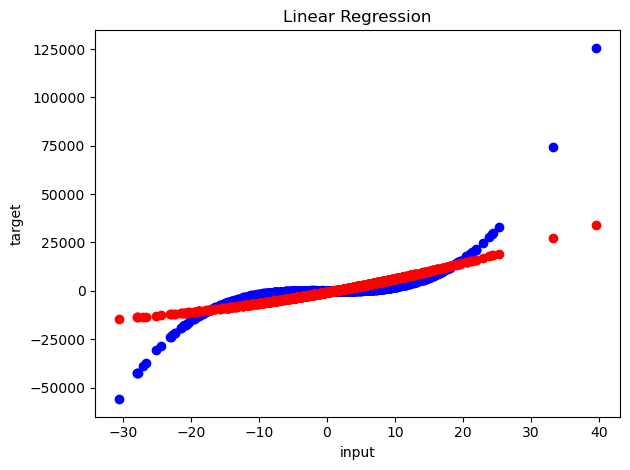

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(trainData['input'], trainData['target'], color='blue')
ax.scatter(trainData['input'], lin_reg_2ndorder.predict(X_2ndorder_train), color='red')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [16]:
b0 = lin_reg_2ndorder.intercept_[0]
b1 = lin_reg_2ndorder.coef_[0][0]
b2 = lin_reg_2ndorder.coef_[0][1]
r2 = lin_reg_2ndorder.score(X_2ndorder_train, y_2ndorder_train)

In [17]:
print(f"y = {b0:.2f} + {b1:.2f}x + {b2:.2f}x^2")
print(f"R^2: {lin_reg_2ndorder.score(X_2ndorder_train, y_2ndorder_train):.3f}")

y = -721.61 + 636.26x + 6.12x^2
R^2: 0.558


### Testing the model using 2nd order polynomial (linear regression technique)

In [18]:
new_test_df = pd.DataFrame()
new_test_df['x1'] = testData['input']
new_test_df['x2'] = testData['input']**2  # here we have engineered a new feature
new_test_df['x3'] = testData['input']**3 
new_test_df['y'] = testData['target']

new_test_df.head(3)

,x1,x2,x3,y
507,0.896864,0.804365,0.721406,-141.859686
818,-3.260613,10.631598,-34.665526,87.151159
452,6.743961,45.481011,306.722164,670.791378


In [19]:
X_2ndorder_test = new_test_df[['x1', 'x2']]
y_2ndorder_test = new_test_df['y']

print(X_2ndorder_test.shape)
print(y_2ndorder_test.shape)

(200, 2)
(200,)


In [20]:
lin_test_pred = lin_reg_2ndorder.predict(X_2ndorder_test)
lin_test_rmse = np.sqrt(mean_squared_error(y_2ndorder_test, lin_test_pred))

rmses = pd.concat([rmses, pd.DataFrame({'model':"lin reg 2nd order Poly", "itertions": "NA", 'rmse': lin_test_rmse}, index=[0])])

print(f"Linear regression wt 2nd order Polynomial input Test RMSE: {lin_test_rmse:.3f}")

Linear regression wt 2nd order Polynomial input Test RMSE: 4318.280


### Fitting the model on train data using 3rd order polynomial (linear regression technique)

In [21]:
X_train_3rdorder = new_df[['x1', 'x2', 'x3']]
y_train_3rdorder = new_df['y']

print(X_train_3rdorder.shape)
print(y_train_3rdorder.shape)


(800, 3)
(800,)


In [22]:
lin_reg_3rdorder=LinearRegression()

lin_reg_3rdorder = LinearRegression().fit(new_df[['x1', 'x2', 'x3']],new_df[['y']]) # note: the double square brackets are important! 

# see pandas_dataframe_demo.ipynb for more details on how to work with pandas dataframes

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

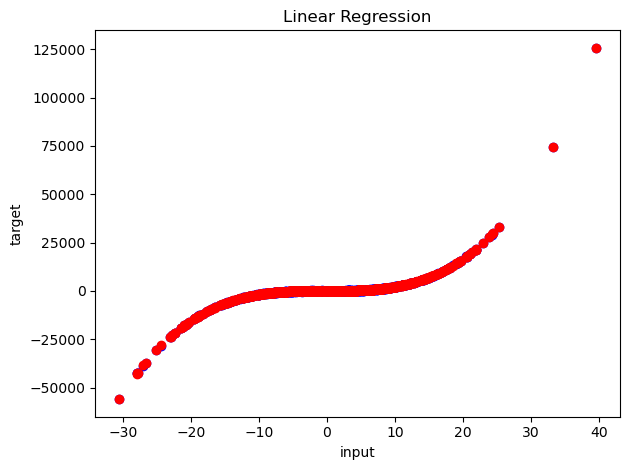

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(trainData['input'], trainData['target'], color='blue')
ax.scatter(trainData['input'], lin_reg_3rdorder.predict(X_train_3rdorder), color='red')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [24]:
b0 = lin_reg_3rdorder.intercept_[0]
b1 = lin_reg_3rdorder.coef_[0][0]
b2 = lin_reg_3rdorder.coef_[0][1]
b3 = lin_reg_3rdorder.coef_[0][2]
r2 = lin_reg_3rdorder.score(X_train_3rdorder, y_train_3rdorder)

... using fstring formatting, we can display these values as follows...

In [25]:
print(f"y = {b0:.2f} + {b1:.2f}x + {b2:.2f}x^2 + {b3:.2f}x^3")
print(f"R^2: {lin_reg_3rdorder.score(X_train_3rdorder, y_train_3rdorder):.3f}") 
# for more on fstrings see here...
# https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

y = -0.99 + -1.15x + 1.03x^2 + 2.00x^3
R^2: 1.000


### Testing the model using 3rd order polynomial (linear regression technique)

In [26]:
X_test_3rdorder = new_test_df[['x1', 'x2', 'x3']]
y_test_3rdorder = new_test_df['y']

print(X_test_3rdorder.shape)
print(y_test_3rdorder.shape)


(200, 3)
(200,)


In [27]:
lin3rd_test_pred = lin_reg_3rdorder.predict(X_test_3rdorder)
lin3rd_test_rmse = np.sqrt(mean_squared_error(y_test_3rdorder, lin3rd_test_pred))

rmses = pd.concat([rmses, pd.DataFrame({'model':"lin reg 3rd order Poly", "itertions": "NA", 'rmse': lin3rd_test_rmse}, index=[0])])

print(f"Linear regression wt 3rd order Polynomial input Test RMSE: {lin3rd_test_rmse:.3f}")

Linear regression wt 3rd order Polynomial input Test RMSE: 102.176


### Fit and test a Linear Regression Using Stochastic Gradient Descent

In [28]:
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.01)
sgd_reg.fit(X_train, np.ravel(y_train))
noOfIterationslin = sgd_reg.n_iter_
print(f"Number of iterations = {noOfIterationslin}")

results["SGD_preds"] = sgd_reg.predict(X_train)

Number of iterations = 21


In [29]:
SGD_test_pred = sgd_reg.predict(X_test)
SGD_test_rmse = np.sqrt(mean_squared_error(y_test, SGD_test_pred))

rmses = pd.concat([rmses, pd.DataFrame({'model':"SGD lin reg", "itertions": noOfIterationslin, 'rmse': SGD_test_rmse}, index=[0])])

print(f"SGD Test RMSE: {SGD_test_rmse:.3f}")

SGD Test RMSE: 4364.995


### Fitting the model on train data using 3rd order polynomial (SGD Gradient Descent)

In [30]:
poly_features = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [31]:
X_train_poly

array([[  1.        , -15.38793246, 236.78846531],
       [  1.        ,  12.91188903, 166.71687828],
       [  1.        ,   1.75167729,   3.06837334],
       ...,
       [  1.        ,  18.03588981, 325.29332141],
       [  1.        , -12.33120735, 152.05867482],
       [  1.        ,   2.34415698,   5.49507194]])

In [32]:
poly_lin_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.01) 
poly_lin_reg.fit(X_train_poly, np.ravel(y_train))
noOfIterationspoly = poly_lin_reg.n_iter_
print(f"Number of iterations = {noOfIterationspoly}")

results["SGD_preds_ using 2nd order polynomial"] = poly_lin_reg.predict(X_train_poly)

Number of iterations = 20


### Testing the model on test data using 2nd order polynomial (SGD Gradient Descent)

In [33]:
poly_test_pred = poly_lin_reg.predict(X_test_poly)
poly_test_rmse = np.sqrt(mean_squared_error(y_test, poly_test_pred))

rmses = pd.concat([rmses, pd.DataFrame({'model':"SGD 3rd order Poly", "itertions": noOfIterationspoly, 'rmse': poly_test_rmse}, index=[0])])

print(f"SGD wt 3rd order Polynomial input Test RMSE: {poly_test_rmse:.3f}")

SGD wt 3rd order Polynomial input Test RMSE: 17199581339538.365


### Comparing results with standard linear regression techniques to SGD Gradient Descent

In [34]:
rmses.sort_values(by=['model'])

,model,itertions,rmse
0,SGD 3rd order Poly,20,1.719958e+13
0,SGD lin reg,21,4.364995e+03
0,lin reg 2nd order Poly,NA,4.318280e+03
0,lin reg 3rd order Poly,NA,1.021762e+02


### ICP04-Gradient Descent Conclusion


From the results, I have evaluated the performance of different types of regression models on a given dataset. I can deduce following from the results

* SGD on 3rd order Polynomial: This is a stochastic gradient descent model with a 3rd order polynomial feature transformation. The RMSE (Root Mean Square Error) for this model is extremely high (1.719958e+13), indicating that the model's predictions are, on average, off by a very large amount. This could suggest that the model is not a good fit for the data, or perhaps there might be some issues with the model setup or data processing.

* SGD linear regression: This model uses stochastic gradient descent for linear regression. The RMSE is 4364.995, which is much lower than the SGD 3rd order Polynomial model, indicating that it's a much better fit for the data.

* Linear regression 2nd order Polynomial: This is a linear regression model with a 2nd order polynomial feature transformation. The RMSE is even lower at 4318.280, which suggests it performs better than the above two models.

* Linear regression 3rd order Polynomial: This model again uses linear regression, this time with a 3rd order polynomial feature transformation. The RMSE is extremely low (102.1762), indicating that it performs the best out of the four models.

This results suggests that the data is best captured with a polynomial transformation.The linear regression models seem to perform better than the stochastic gradient descent models in this case. Also linear regression moddel for 3rd ordel polynomial has R^2 value 1 which I can coclude that Linear regression on 3rd order Polynomial is the best model and fit.